# **Lecture 15 Support Vector Machine**

https://scikit-learn.org/stable/modules/svm.html

Let's start from an example:

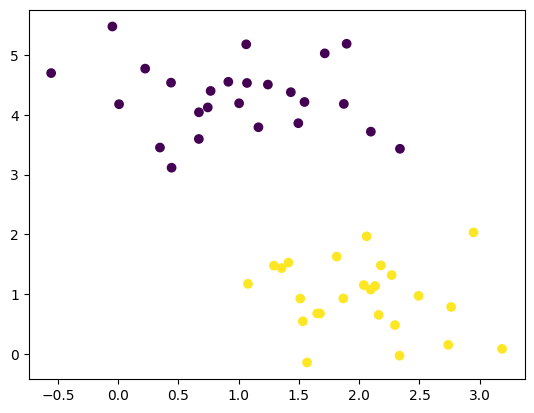

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 50, centers = 2, random_state=0, cluster_std = 0.6)

plt.scatter(X[:,0], X[:,1], c=y)

Imagine you're hosting a party and want to separate the living room into two areas: one for guests who prefer quiet conversations and another for guests who enjoy loud music. Each guest is represented by a point on the floor: quiet lovers are blue points, and music lovers are yellow points. Your goal is to lay down a tape line that separates these two groups, maximizing the space (margin) for each group to enjoy the party.

The line is a model for classification.

We can draw many lines that can meet the requirement of "separating the data into two clusters":

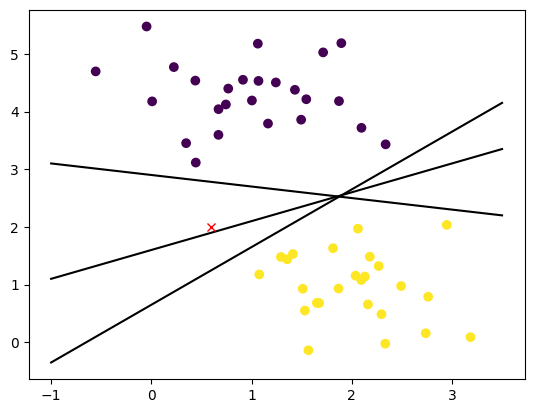

In [ ]:
import numpy as np

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y)

for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit+b, 'k-')

plt.plot(0.6, 2, 'rx')

Each of the three lines meets our requirement.  But if we have a new data point, indicated by the red x, it will be classified into different catergories.

**That suggests:  we should put additional constraints on the requirement of the classification line.**

If we define 'margin' as the distance from the line to the nearest point,

The problem becomes: the line that maximize the Margin is the one we want as the optimal model (maximizing the space (margin) for each group to enjoy the party).
The algorithm to find the line with maximum margin is **support vector machine (SVM)**.

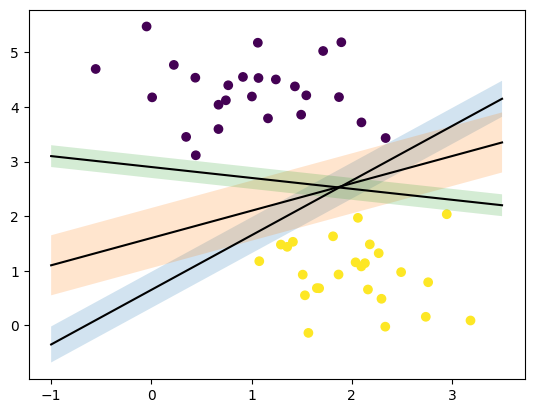

In [ ]:
import numpy as np

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y)

for m,b,d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit+b
    plt.plot(xfit, yfit, 'k-')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', alpha=0.2)

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

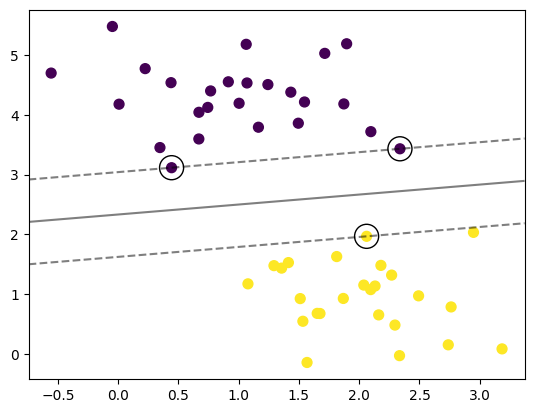

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

# for visualization
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, edgecolors='k', facecolors='none');

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(model)
model.support_vectors_



*   Hyperplane: This is our tape line. In two dimensions, it's a line, but in higher dimensions, it becomes a plane or a hyperplane.
*   Margins: The amount of space on either side of the hyperplane. We want this to be as large as possible to clearly define our groups.
*   Support Vectors: The closest points (guests) to the hyperplane. These points are crucial as they define where the hyperplane is placed.

**The main goal of SVM is to find a hyperplane (in two dimensions, a line) that best separates the data points into two classes. This hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest points from either class. These nearest points are called support vectors.**

To provide a clear understanding of how Support Vector Machines (SVM) work, let's break down the process into manageable steps. Here’s how SVM goes about finding the best way to classify data:

### 1. Representation of Data
First, SVM needs data to be represented in a way that it can process. In a classification task, this typically means plotting each item in the dataset within an n-dimensional space (where n is the number of features you have). Each feature represents a different coordinate, so each item is represented as a point in this space.

### 2. Selection of Hyperplane
The SVM algorithm tries to find a hyperplane (in 2D, this is a line) that best separates the classes in the dataset. The "best" hyperplane is the one that leaves the maximum margin (distance) from both classes.

### 3. Maximizing the Margin
The margin is defined as the distance between the hyperplane and the nearest points from each class, which are known as support vectors. Maximizing this margin helps in enhancing the model's robustness and its ability to generalize well to unseen data. This is because a larger margin allows for more flexibility and less chance of overfitting on the training data.

### 4. Support Vectors Identification
Support vectors are the data points that lie closest to the decision surface (or hyperplane). They are crucial because they are the points that directly influence the position and orientation of the hyperplane. The SVM algorithm specifically focuses on these points, ignoring others that are further away, as they do not affect the margin.

### 5. Solving the Optimization Problem
SVM formulation can be seen as an optimization problem where the objective is to maximize the margin while minimizing classification errors. This involves mathematical techniques that solve for the parameters of the hyperplane.



Now let's take a look at another example. Can we use a line to separate the two groups of data?

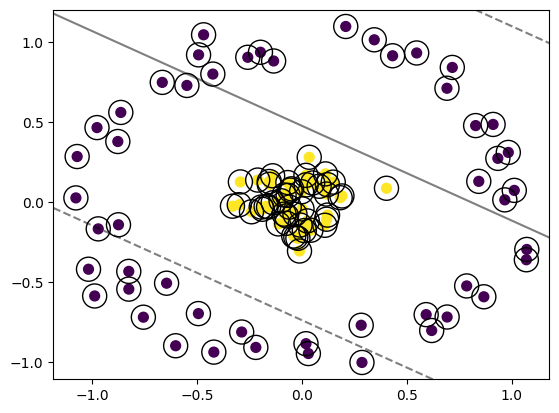

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf, plot_support=True);

It is clear that no linear discrimination will ever be able to separate this data. But we can think about how we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function centered on the middle clump:

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

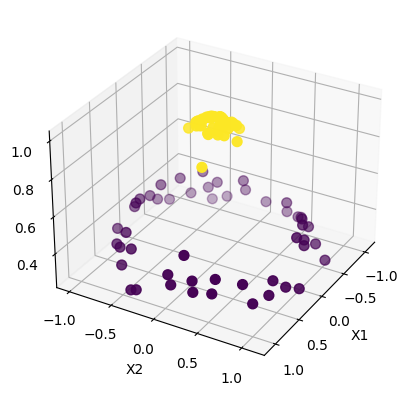

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

#r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('r')

interact(plot_3D, elev=np.arange(-90,91,30), azip=(-180, 180),
         X=fixed(X), y=fixed(y));

### The Kernel Trick
When data is not linearly separable, SVM uses the kernel trick to transform the input space into a higher-dimensional space where a separation is possible. This doesn’t involve actually computing the coordinates in the higher-dimensional space but rather relies on calculating the inner products of data points, which the kernel functions facilitate. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.

### Kernel
Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a kernel transformation, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting N points into N dimensions—is that it might become very computationally intensive as N grows large - use the kernel trick!

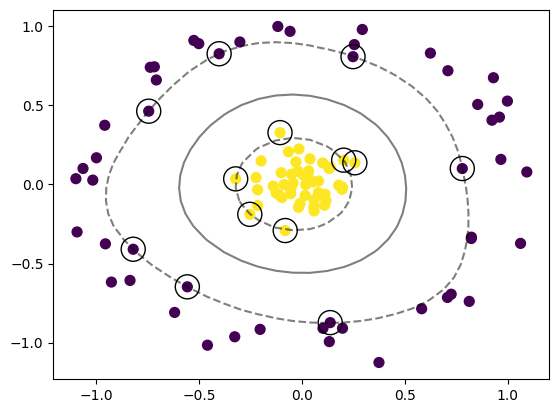

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf, plot_support=True)

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this:

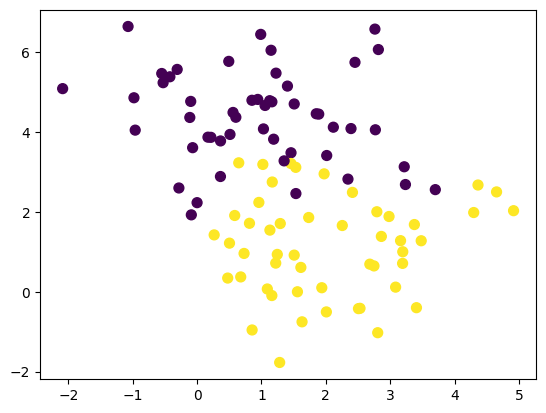

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

We can "softens" the margin: allows some of the points to creep into the margin if that allows a better fit.

The parameter C controls the hardness the margin.
The larger C is, the harder the margin is.

Text(0.5, 1.0, 'C = 10000000.0')

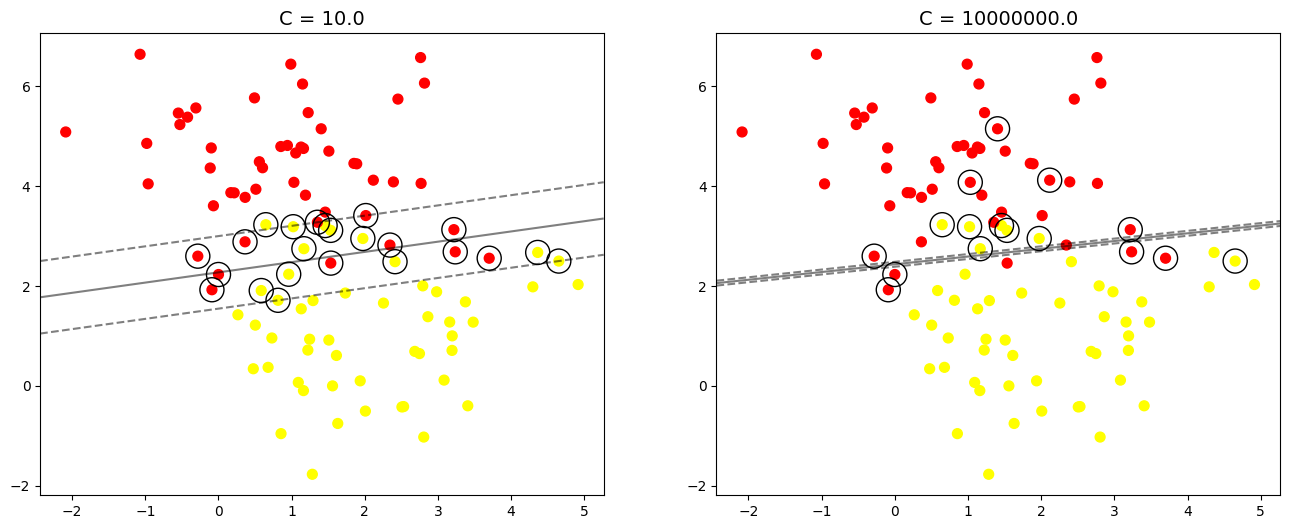

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

i = 0
C = 10
model = SVC(kernel='linear', C=C).fit(X, y)
ax[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, ax[i])
ax[i].scatter(model.support_vectors_[:, 0],
model.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');
ax[i].set_title('C = {0:.1f}'.format(C), size=14)

i = 1
C = 10000000
model = SVC(kernel='linear', C=C).fit(X, y)
ax[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, ax[i])
ax[i].scatter(model.support_vectors_[:, 0],
model.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');
ax[i].set_title('C = {0:.1f}'.format(C), size=14)

# **ROC Curves and AUC**

ROC (Receiver Operating Characteristic) curves

AUC (Area Under the Curve)


### What is ROC?

The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied.

The curve plots True Positive Rate (TPR) against the False Positive Rate (FPR):

TPR = TP/(TP+FN)

FPR = FP/(FP+TN)

### What is AUC?

The Area Under the ROC Curve (AUC) provides a single scalar value summarizing the classifier's overall ability to distinguish between classes.

AUC = 1: Perfect classification

0.5 < AUC < 1: Better than random guessing

AUC = 0.5: Equivalent to random guessing

AUC < 0.5: Worse than random guessing

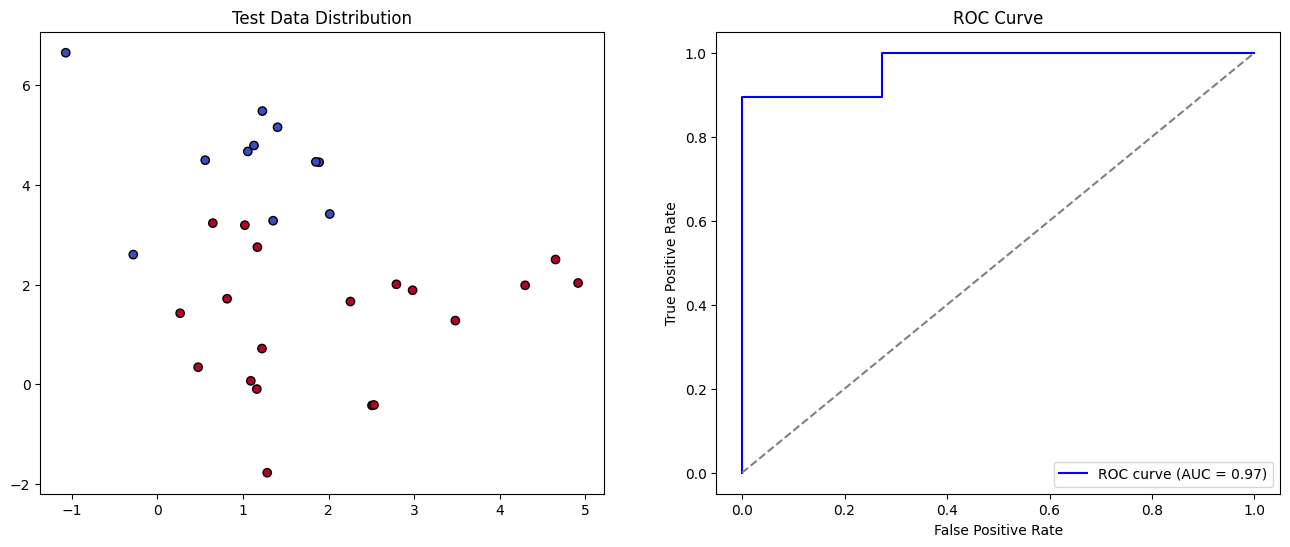

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier
model = SVC(kernel='linear', C=10, probability=True)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of data
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
ax[0].set_title('Test Data Distribution')

# ROC Curve
ax[1].plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend()

plt.show()